Milestone 2 

In [1]:
import os

import matplotlib.pyplot as plt
import music21
from music21 import *
import pandas as pd

In [2]:
DATA_DIR = r'./another_midi'
# TEST_FILE = r'./another_midi/ps02/ps02_04.mid'

In [3]:
def preprocessing(file_path):
    note_list = []
    midi = converter.parse(file_path)
    parts = instrument.partitionByInstrument(midi)
    for music_instrument in parts:
        for element_by_offset in stream.iterator.OffsetIterator(music_instrument):
            for entry in element_by_offset:
                if isinstance(entry, note.Note):
                    note_list.append(str(entry.pitch))
                    
    df = pd.DataFrame(note_list, columns=['pitch'])
    df = df[df['pitch'] != 'Rest']
    df['frequency'] = df['pitch'].apply(lambda x: pitch.Pitch(x).freq440)
    return df['frequency'].mean()
    # return note_list

In [5]:
avg_freq = []
for folder in os.listdir(DATA_DIR):
    for midi_file in os.listdir(f'{DATA_DIR}/{folder}'):
        if midi_file.endswith('.mid'):
            file_path = f'{DATA_DIR}/{folder}/{midi_file}'
            cur_freq = preprocessing(file_path)
            avg_freq.append(cur_freq)
    print(f'>>> Finish sonata {folder}')

ps01_01.mid ---- 420.7174967356267
ps01_02.mid ---- 501.0419537476744
ps01_03.mid ---- 416.55170467200475
ps01_04.mid ---- 308.0087009831856
ps02_01.mid ---- 364.19427496428835
ps02_02.mid ---- 257.09456981405674
ps02_03.mid ---- 360.8156423470514
ps02_04.mid ---- 414.93125512167757
ps03_01.mid ---- 463.61647760529183
ps03_02.mid ---- 415.7138459187584
ps03_03.mid ---- 421.6617364341829
ps03_04.mid ---- 590.974056969714
ps04_01.mid ---- 432.85521098026067
ps04_02.mid ---- 382.3618366929264
ps04_03.mid ---- 369.99649123929026
ps04_04.mid ---- 432.8561003922695
ps05_01.mid ---- 343.4014757200653
ps05_02.mid ---- 437.0983250141123
ps05_03.mid ---- 458.5075667924404
ps06_01.mid ---- 448.06857352031983
ps06_02.mid ---- 395.0359529295331
ps06_03.mid ---- 425.7034062801472
ps07_01.mid ---- 384.79924653184605
ps07_02.mid ---- 370.28114159633617
ps07_03.mid ---- 467.7214234620205
ps07_04.mid ---- 416.27916040773437
ps08_01.mid ---- 346.628516623104
ps08_02.mid ---- 266.7058250301471
ps08_03.mid

In [20]:
df_freq = pd.DataFrame(avg_freq, columns=['avg_freq'])

indexes = []
movements = []
for folder in os.listdir(DATA_DIR):
    for midi_file in os.listdir(f'{DATA_DIR}/{folder}'):
        if midi_file.endswith('.mid'):
            indexes.append(midi_file[:4])
            movements.append(midi_file[5:7])
df_freq['sonata'] = indexes
df_freq['movement'] = movements

In [21]:
df_freq

,avg_freq,sonata,movement
0,420.717497,ps01,01
1,501.041954,ps01,02
2,416.551705,ps01,03
3,308.008701,ps01,04
4,364.194275,ps02,01
...,...,...,...
92,538.267646,ps31,01
93,587.574485,ps31,02
94,371.863389,ps31,03
95,502.663532,ps32,01


In [22]:
sonata_pitch = df_freq.groupby(['sonata']).mean()

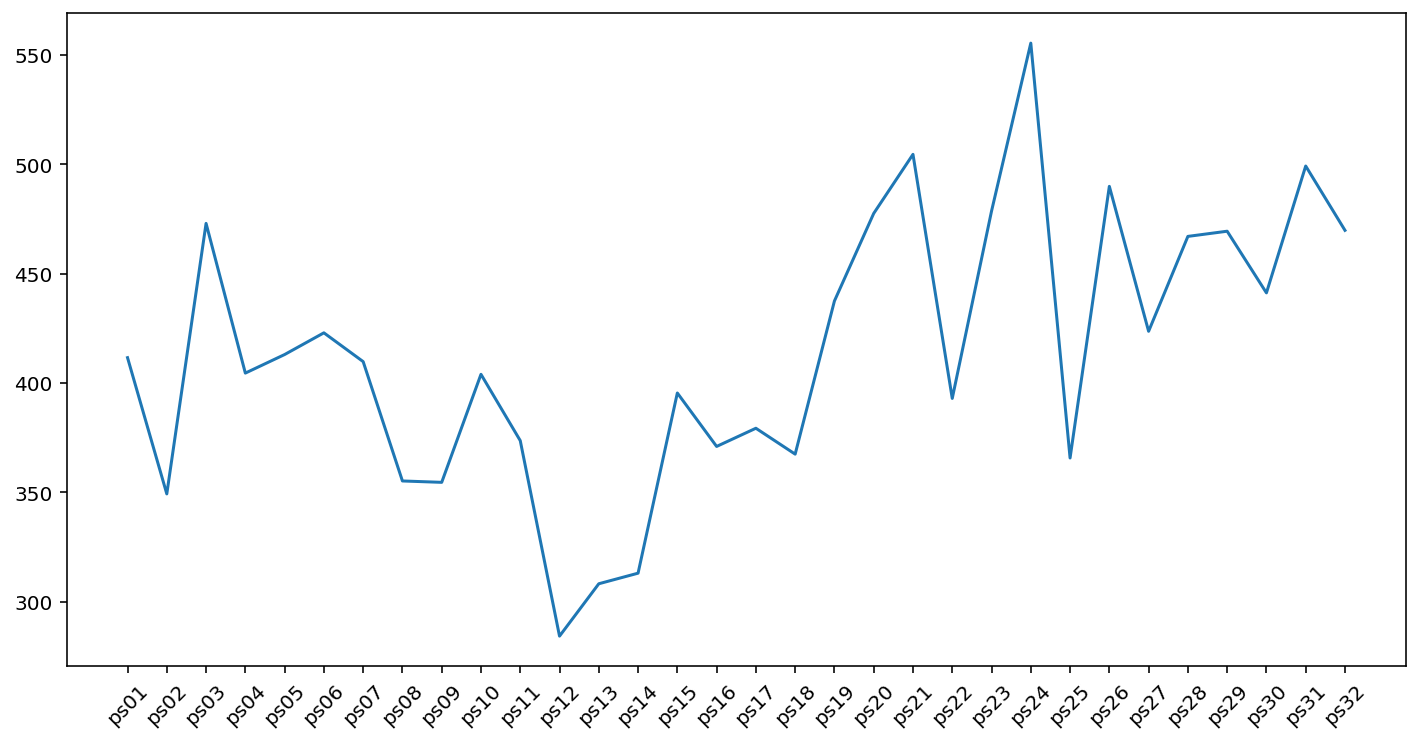

In [30]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.plot(sonata_pitch)

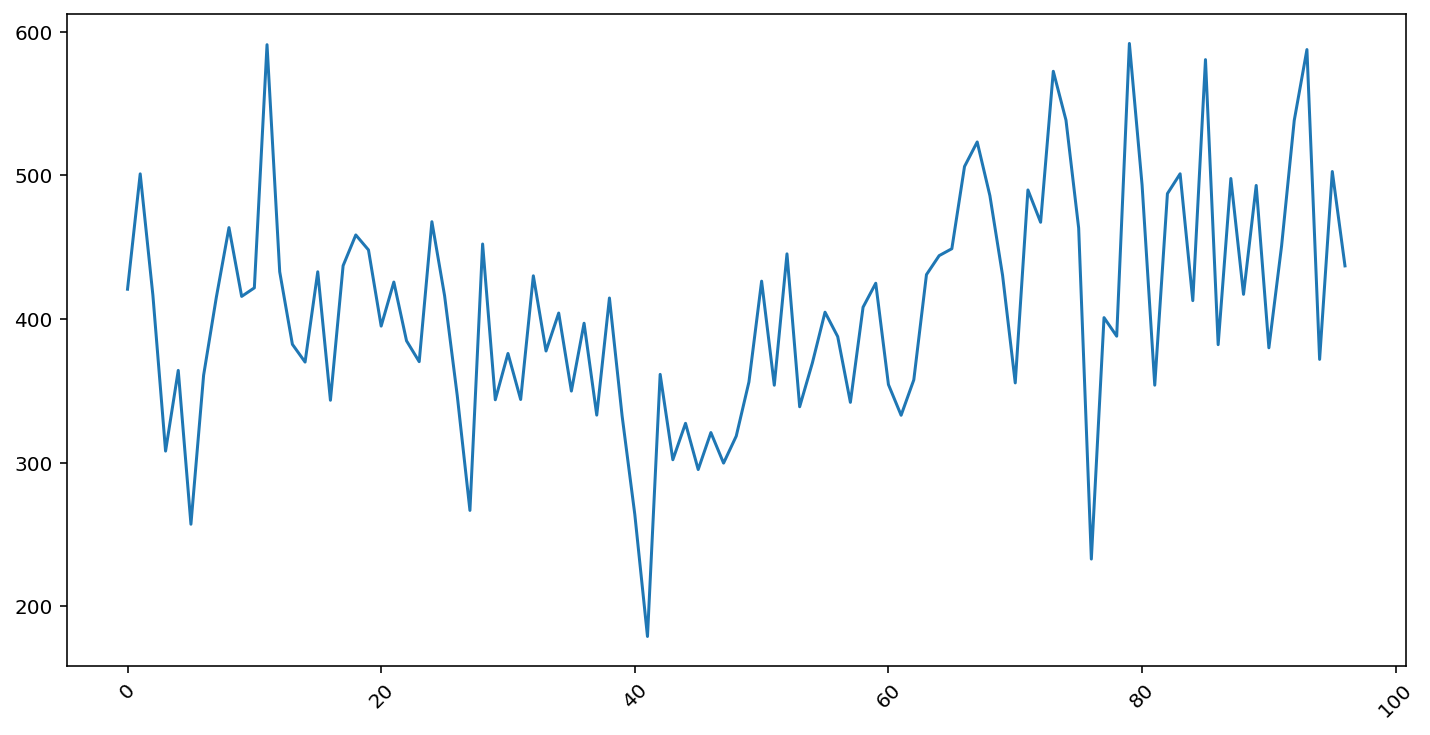

In [32]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation=45)
plt.plot(df_freq['avg_freq'])